# Charpter 3

## Problem 8

In [416]:
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression as lr, RidgeCV, LassoCV 
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
 
df= pd.read_csv("Auto.csv")
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

(a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output

In [417]:
df.dtypes
df=df[df['horsepower']!='?']
col = [i for i in df.columns if i not in ['name', 'mpg', 'cylinders']]
df[col]=df[col].astype('float')

In [418]:
model=sm.regression.linear_model.OLS(np.array(df['mpg']), np.array(df["horsepower"]))
r=model.fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                    5.67e-91
Time:                        10:00:04   Log-Likelihood:                         -1608.1
No. Observations:                 392   AIC:                                      3218.
Df Residuals:                     391   BIC:                                      3222.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

There is strong relationship between mpg and horse power. P value is zero, R-squared = 0.65 

(b) Plot the response and the predictor. 

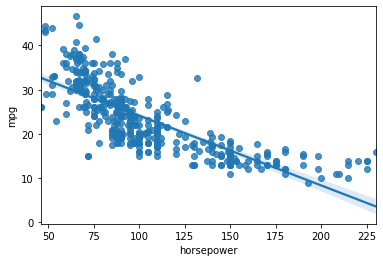

In [419]:
sns.regplot(x='horsepower', y='mpg', data=df)

(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

Text(0, 0.5, 'residuals')

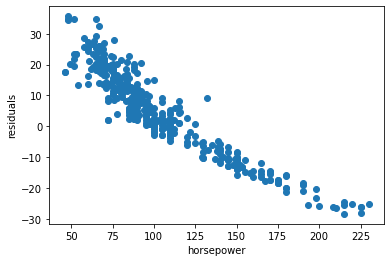

In [420]:
plt.scatter(df['horsepower'], r.resid)
plt.xlabel("horsepower")
plt.ylabel("residuals")

There are more outliers at low horsepower.

## Problem 9

In [421]:
col = [i for i in df.columns if i not in ['name', 'mpg']]
print(col)
model=sm.regression.linear_model.OLS(np.array(df['mpg']), np.array(df[col]))
r=model.fit()
print(r.summary())

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        10:00:05   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

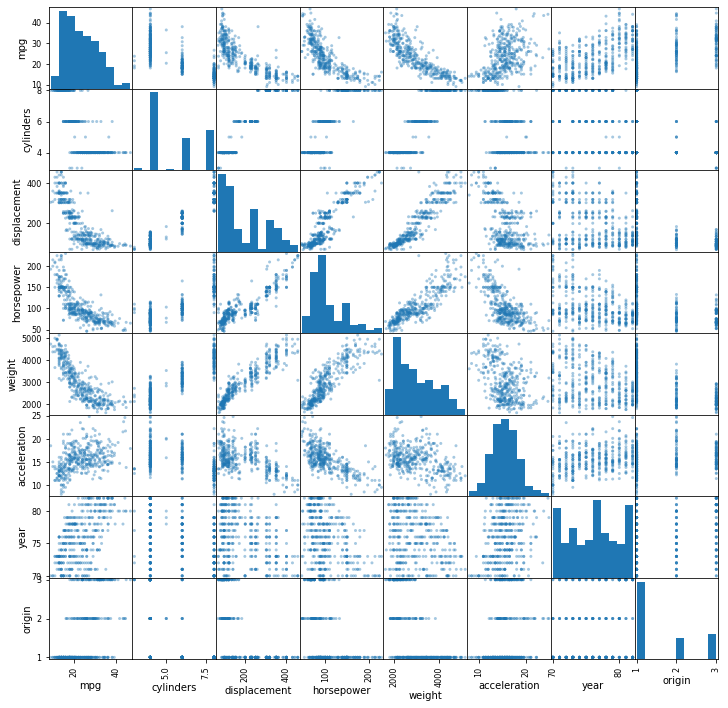

In [422]:
axes = scatter_matrix(df, alpha=0.4, figsize=(12, 12))
#plt.tight_layout()
plt.savefig('scatter_matrix.png')

(b) Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable, cor() which is qualitative.

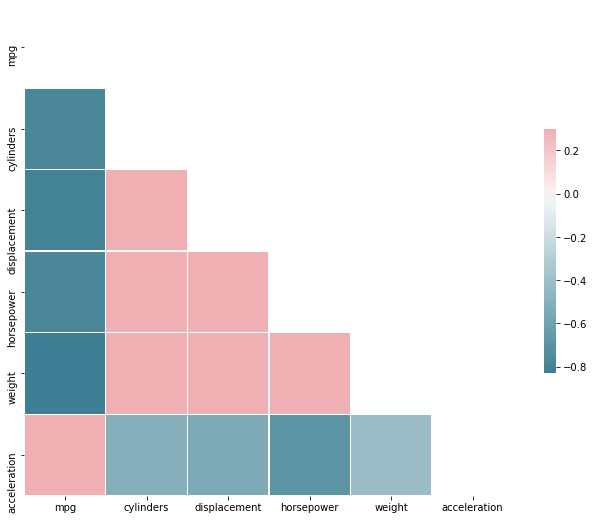

In [423]:
#col=df.select_dtypes(['float', 'int', 'int64']).columns
col=[i for i in df.columns if i not in ['year', 'origin', 'mpg01']]
#dfn=df[col]
corr = df[col].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#df=df.dropna()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

(c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. 

In [424]:
col = [i for i in df.columns if i not in ['name', 'mpg']]
print(col)
model=sm.regression.linear_model.OLS(np.array(df['mpg']), np.array(df[col]))
r=model.fit()
print(r.summary())

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        10:00:12   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err

Very large P-values for cylenders and acceleration, there is no relationship between them and mpg.

(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

Text(0, 0.5, 'residuals')

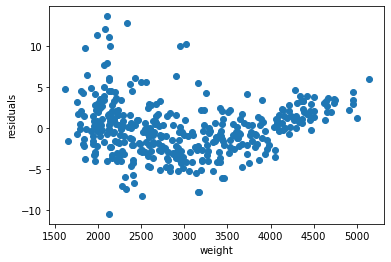

In [425]:
plt.scatter(df['weight'], r.resid)
plt.xlabel("weight")
plt.ylabel("residuals")

Text(0, 0.5, 'residuals')

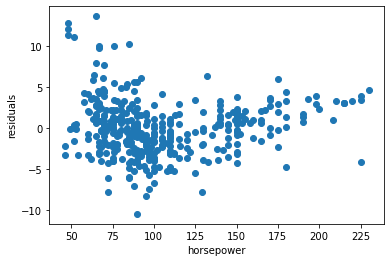

In [426]:
plt.scatter(df['horsepower'], r.resid)
plt.xlabel("horsepower")
plt.ylabel("residuals")

Text(0, 0.5, 'residuals')

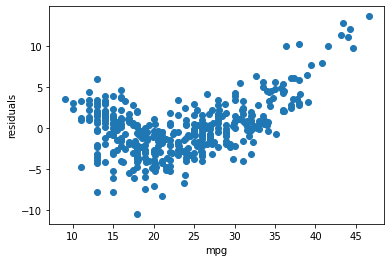

In [427]:
plt.scatter(df['mpg'], r.resid)
plt.xlabel("mpg")
plt.ylabel("residuals")

Residuals increase for high mpg or for smaller horsepower and weights.

(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

In [428]:
model=smf.ols(formula = 'mpg ~ weight+horsepower+horsepower+displacement+year+origin', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     351.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          2.73e-141
Time:                        10:00:12   Log-Likelihood:                -1025.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     386   BIC:                             2086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.6939      4.120     -4.051      0.000     -24.795      -8.592
weight          -0.0063      0.001    -11.124      0.000      -0.007      -0.005
horsepower      -0.0219      0.011     -2.033      0.043      -0.043      -0.001
displacement     0.0114      0.006      2.054      0.041       0.000       0.022
year             0.7484      0.051     14.707      0.000       0.648       0.848
origin           1.3853      0.277      4.998      0.000       0.840       1.930
==============================================================================
Omnibus:                       34.200   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.468
Skew:                           0.552   Prob(JB):                     2.01e-13
Kurtosis:                       4.536   Cond. No.                     7.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [429]:
sm.stats.anova_lm(r)

,df,sum_sq,mean_sq,F,PR(>F)
weight,1.0,16497.759763,16497.759763,1485.507271,2.170800e-134
horsepower,1.0,327.388269,327.388269,29.479012,1.001535e-07
displacement,1.0,13.819676,13.819676,1.244365,2.653255e-01
year,1.0,2415.766538,2415.766538,217.522791,2.319882e-39
origin,1.0,277.417016,277.417016,24.979452,8.804500e-07
Residual,386.0,4286.842209,11.105809,NaN,NaN


In [430]:
model=smf.ols(formula = 'mpg ~ horsepower+weight*horsepower+displacement+horsepower*displacement+year+origin', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     348.4
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          5.06e-162
Time:                        10:00:12   Log-Likelihood:                -970.21
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     384   BIC:                             1988.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.3788      4.013     -0.344      0.731      -9.268       6.511
horsepower                 -0.2066      0.021     -9.730      0.000      -0.248      -0.165
weight                     -0.0082      0.001     -5.877      0.000      -0.011      -0.005
weight:horsepower        3.197e-05   9.83e-06      3.254      0.001    1.27e-05    5.13e-05
displacement               -0.0230      0.012     -1.897      0.059      -0.047       0.001
horsepower:displacement     0.0002    8.4e-05      2.655      0.008    5.78e-05       0.000
year                        0.7614      0.045     17.063      0.000       0.674       0.849
origin                      0.7903      0.248      3.193      0.002       0.304       1.277
==============================================================================
Omnibus:                       37.745   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.167
Skew:                           0.593   Prob(JB):                     4.29e-15
Kurtosis:                       4.627   Cond. No.                     1.11e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(f) Try a few different transformations of the variables, such as
log(X), √X, $X^2$. Comment on your findings

In [431]:
model=smf.ols(formula = 'mpg ~ np.log(weight)+np.log(horsepower)+np.log(displacement)+year+origin', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     422.3
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          4.88e-154
Time:                        10:00:13   Log-Likelihood:                -995.21
No. Observations:                 392   AIC:                             2002.
Df Residuals:                     386   BIC:                             2026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.9083      9.797     11.219      0.000      90.647     129.170
np.log(weight)         -16.4583      1.781     -9.239      0.000     -19.961     -12.956
np.log(horsepower)      -3.4467      1.056     -3.264      0.001      -5.523      -1.370
np.log(displacement)     0.6083      1.024      0.594      0.553      -1.405       2.622
year                     0.7339      0.047     15.662      0.000       0.642       0.826
origin                   0.9296      0.273      3.407      0.001       0.393       1.466
==============================================================================
Omnibus:                       41.761   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.642
Skew:                           0.626   Prob(JB):                     1.38e-17
Kurtosis:                       4.785   Cond. No.                     4.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [432]:
model=smf.ols(formula = 'mpg ~ np.sqrt(weight)+np.sqrt(horsepower)+np.log(displacement)+year+origin', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     385.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          1.15e-147
Time:                        10:00:13   Log-Likelihood:                -1010.1
No. Observations:                 392   AIC:                             2032.
Df Residuals:                     386   BIC:                             2056.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0375      5.057      0.996      0.320      -4.905      14.980
np.sqrt(weight)         -0.5632      0.067     -8.373      0.000      -0.695      -0.431
np.sqrt(horsepower)     -0.3739      0.210     -1.779      0.076      -0.787       0.039
np.log(displacement)    -0.8367      1.067     -0.784      0.434      -2.935       1.262
year                     0.7300      0.049     14.963      0.000       0.634       0.826
origin                   0.9021      0.286      3.158      0.002       0.341       1.464
==============================================================================
Omnibus:                       42.757   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.086
Skew:                           0.620   Prob(JB):                     5.51e-19
Kurtosis:                       4.900   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [433]:
model=smf.ols(formula = 'mpg ~ weight**2+horsepower**2+displacement**2+year+origin', data=df)
r=model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     351.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          2.73e-141
Time:                        10:00:13   Log-Likelihood:                -1025.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     386   BIC:                             2086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.6939      4.120     -4.051      0.000     -24.795      -8.592
weight          -0.0063      0.001    -11.124      0.000      -0.007      -0.005
horsepower      -0.0219      0.011     -2.033      0.043      -0.043      -0.001
displacement     0.0114      0.006      2.054      0.041       0.000       0.022
year             0.7484      0.051     14.707      0.000       0.648       0.848
origin           1.3853      0.277      4.998      0.000       0.840       1.930
==============================================================================
Omnibus:                       34.200   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.468
Skew:                           0.552   Prob(JB):                     2.01e-13
Kurtosis:                       4.536   Cond. No.                     7.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Logs gives best result for R2. Pvalue is large for log(displacement). For sqrt p values are only good for weight

## Problem 11 Chapter 4

In [442]:
def model_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)
def misclass(cm, l):
    return (cm[0][1]+cm[1][0])/l

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

In [435]:
df["mpg01"] = 0
df.loc[df["mpg"]>df["mpg"].median(), ["mpg01"]] = 1

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

From the figures, see scatterplot matrix in problem 9 Ch.3 above, weight, horsepower, displacement, cylinders, acceleration can be also useful in predicting mpg01. I will check the best choice looking at result also.

In [436]:
X=df[['horsepower', 'weight', 'displacement', 'cylinders']]
y=df['mpg01']

(c) Split the data into a training set and a test set.

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [438]:
model = LinearDiscriminantAnalysis()
#confusion matrix
cm=model_predict(model, X_train, y_train, X_test, y_test)
cm

array([[52, 18],
       [ 2, 58]], dtype=int64)

In [447]:
#wrong classifications
misclass(cm, len(y_test))

0.15384615384615385

(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [453]:
model = QuadraticDiscriminantAnalysis()
cm = model_predict(model, X_train, y_train, X_test, y_test)
cm

array([[52, 18],
       [ 3, 57]], dtype=int64)

In [449]:
#wrong classifications
misclass(cm, len(y_test))

0.16153846153846155

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [450]:
model = LogisticRegression()
cm=model_predict(model, X_train, y_train, X_test, y_test)
cm

array([[50, 20],
       [ 2, 58]], dtype=int64)

In [452]:
#wrong classifications
misclass(cm, len(y_test))

0.16923076923076924

(g)Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [462]:
model = KNeighborsClassifier(n_neighbors=2)
cm=model_predict(model, X_train, y_train, X_test, y_test)
cm

array([[57, 13],
       [ 6, 54]], dtype=int64)

In [463]:
#wrong classifications
misclass(cm, len(y_test))

0.14615384615384616

K =2 or 3 gives best result.

## Problem 9 Ch.6

In [464]:
dfc = pd.read_csv("College.csv")
print(dfc)

                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [465]:
dfc.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [466]:
le  = LabelEncoder()
dfc['Private']=le.fit_transform(dfc['Private'].astype('category'))

In [467]:
col=[i for i in dfc.columns if i not in ['Unnamed: 0', 'Apps']]
X=dfc[col]
y=dfc["Apps"]
print(X)

     Private  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0          1    1232     721         23         52         2885          537   
1          1    1924     512         16         29         2683         1227   
2          1    1097     336         22         50         1036           99   
3          1     349     137         60         89          510           63   
4          1     146      55         16         44          249          869   
..       ...     ...     ...        ...        ...          ...          ...   
772        0    1515     543          4         26         3089         2029   
773        1    1805     695         24         47         2849         1107   
774        1    1915     695         34         61         2793          166   
775        1    2453    1317         95         99         5217           83   
776        1    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Perso

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [469]:
model =lr()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [470]:
clf = RidgeCV(alphas=[1e-1, 1, 10, 100, 1000, 2000, 2100, 2500, 3000]).fit(X_train, y_train)
print(clf.alpha_)
y_pred=clf.predict(X_test)
print(mse(y_test, y_pred))

2000.0
1380560.2820212538


In [471]:
clf = LassoCV(alphas=[1e-6, 1e-1, 1, 10, 20, 25, 30, 35, 40, 100]).fit(X_train, y_train)
print(clf.alpha_)
y_pred=clf.predict(X_test)
print(mse(y_test, y_pred))

35.0
1378798.1633385343


1330719.7390226503
16


Text(0, 0.5, 'error')

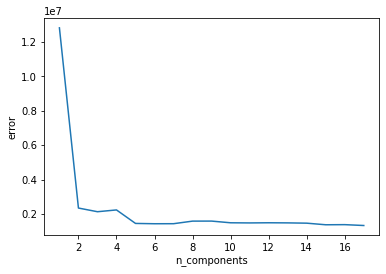

In [472]:
def pca_mse(X, y, X_test, y_test, n):
    error=[]
    for i in range(1,int(max(n))+1):
        pca = PCA(n_components=i)
        Xn_train=pca.fit_transform(X)
        Xn_test=pca.transform(X_test)
        model =lr()
        model.fit(Xn_train, y_train)
        y_pred=model.predict(Xn_test)
        error.append(mse(y_test, y_pred))
    return error
n= np.linspace(1,17, 17)
error=pca_mse(X_train, y_train, X_test, y_test, n)
print(min(error))
print(error.index(min(error)))
plt.plot(n, error)
plt.xlabel("n_components")
plt.ylabel("error")

1235525.9151444898
7


Text(0, 0.5, 'error')

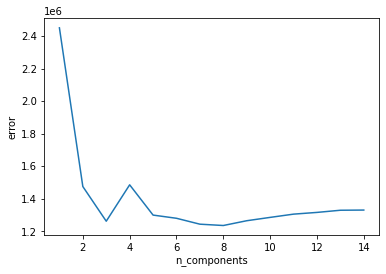

In [473]:
def pls_mse(X_train, y_train, X_test, y_test, n):
    error=[]
    for i in range(1,int(max(n))+1):
        pls = PLS(n_components=i)
        pls.fit(X_train, y_train)
        y_pred=pls.predict(X_test)
        #print(mse(y_test, y_pred))
        error.append(mse(y_test, y_pred))
    return error
n= np.linspace(1, 14, 14)
error=pls_mse(X_train, y_train, X_test, y_test, n)
print(min(error))
print(error.index(min(error)))
plt.plot(n, error)
plt.xlabel("n_components")
plt.ylabel("error")

In [474]:
pls = PLS(n_components=8)
pls.fit(X_train, y_train)
y_pred=pls.predict(X_test)
print(mse(y_test, y_pred))


1235525.9151444898


## Chapter 7

## Problem 8

Fit some of the non-linear models investigated in this chapter to the
Auto data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.

C:\Users\kuzn1\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


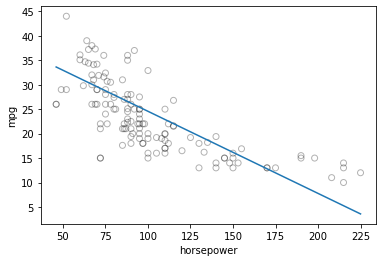

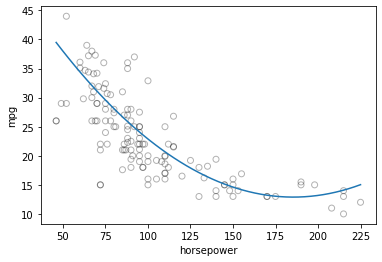

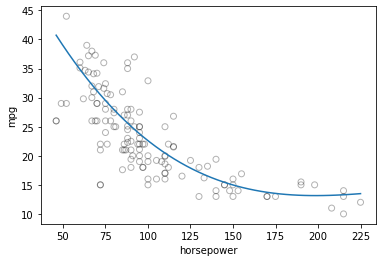

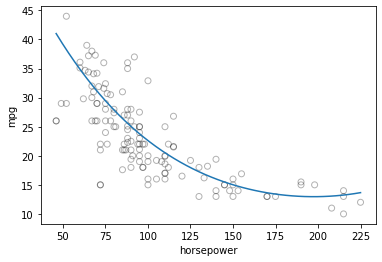

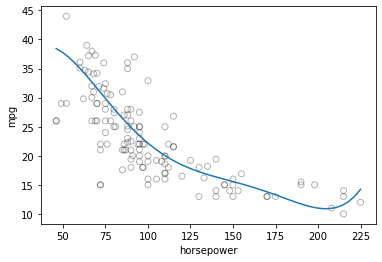

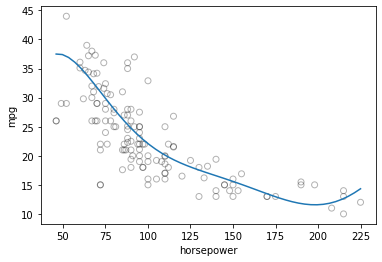

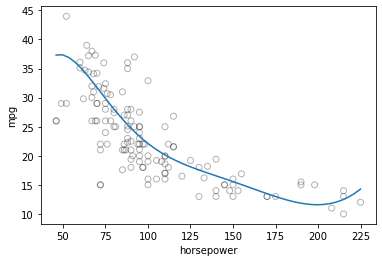

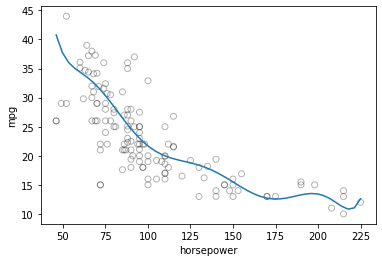

In [475]:
# Generating weights for polynomial function with degree =6
df=df[df['horsepower']!='?']
X=df['horsepower']
Y=df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
error=[]
for i in range(8):
    weights = np.polyfit(X_train, y_train, i+1)
# Generating model with the given weights
    model = np.poly1d(weights)
# Prediction on validation set
    pred = model(X_test)
    error.append(np.mean((pred-y_test)**2))
    xp = np.linspace(X_test.min(), X_test.max())
    pred_plot = model(xp)
    plt.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
    plt.plot(xp, pred_plot)
    plt.xlabel("horsepower")
    plt.ylabel("mpg")
    plt.show()

Text(0, 0.5, 'error')

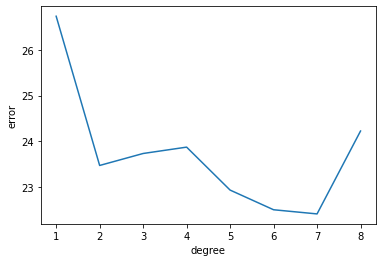

In [476]:
plt.plot(range(1,9), error)
plt.xlabel("degree")
plt.ylabel("error")


In [477]:
min(error)

22.41816589579273

In [478]:
#from sklearn import cross_validation as CV
X = df[['horsepower', 'weight']]
Y=df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
scores=[]
#degrees=range(1,)
for i in range(1,9):
    polynomial_features = PolynomialFeatures(degree=i,
                                             include_bias=False)
    linear_regression = lr()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    pred=pipeline.predict(X_test)
    scores.append(np.mean((pred-y_test)**2))
    
  

Text(0, 0.5, 'score')

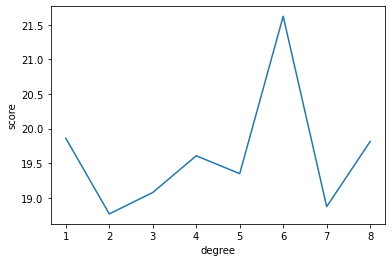

In [479]:
plt.plot(range(1,9), scores)
plt.xlabel("degree")
plt.ylabel("score")

In [480]:
min(scores)

18.76860965404827